<a href="https://colab.research.google.com/github/levivanni/MachineLearningNotes/blob/main/Convolution_%2B_Max_Pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wget
import wget

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9675 sha256=9e94ad091edc1a61683dfe6e67cccd92ec853e8a3dfe70e5240d7d38d8a03dfa
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import cv2

In [ ]:
image = cv2.imread(wget.download('https://live.staticflickr.com/65535/51248753011_fa233df5b3_o_d.jpg'))

In [ ]:
grey_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

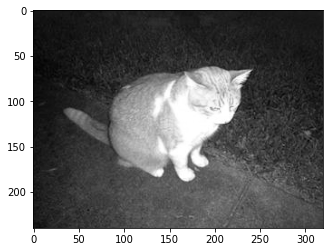

In [ ]:
plt.gray()
plt.imshow(grey_img)

In [ ]:
sobelX = [
  [-1, 0, 1],
  [-2, 0, 2],
  [-1, 0, 1]
]

In [ ]:
sobelY = [
  [ 1, 2, 1],
  [ 0, 0, 0],
  [-1,-2,-1]
]

In [ ]:
import numpy as np

In [ ]:
def conv(grey_img, kernel):
  transformed = np.copy(grey_img)
  m = transformed.shape[0]
  n = transformed.shape[1]
  print(m,n)

  for i in range(1, m - 1):
    for j in range(1, n - 1):
      center_pixel = [i,j]
      center_filter = [1,1]
      xRows = [-1, -1, -1,  0, 0,  1, 1, 1]
      yCols = [-1,  0,  1, -1, 1, -1, 0, 1]

      new_val = 0.0
      for k in range(8):
        x, y = xRows[k], yCols[k]
        image_pixel_x = center_pixel[0] + x
        image_pixel_y = center_pixel[1] + y
        filter_pixel_x = center_filter[0] + x
        filter_pixel_y = center_filter[1] + y
        new_val = new_val + grey_img[image_pixel_x][image_pixel_y] * kernel[filter_pixel_x][filter_pixel_y]
      new_val = new_val + grey_img[i,j] * kernel[1][1]
      if new_val < 0:
        new_val = 0
      if new_val > 255:
        new_val = 255
      
      transformed[i,j] = new_val * 1 # default is 1
  return transformed

In [ ]:
result1 = conv(grey_img, sobelX)

240 320


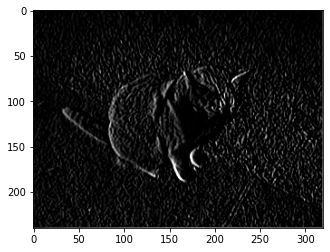

In [ ]:
plt.imshow(result1)
plt.show()

In [ ]:
result2 = conv(grey_img, sobelY)

240 320


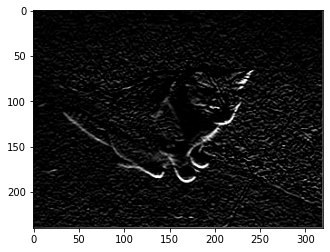

In [ ]:
plt.imshow(result2)
plt.show()

In [ ]:
def maxpool(img):
  m = len(img)
  n = len(img[0])

  new_img = np.zeros((m//2+1, n//2+1))
  xRows = [1, 1, 0]
  yCols = [0, 1, 1]

  for i in range(0, m, 2):
    for j in range(0, n, 2):
      pool = [img[i][j]]
      for k in range(3):
        neighbor_x = i + xRows[k]
        neighbor_y = j + yCols[k]
        if neighbor_x < m and neighbor_y < n:
          pool.append(img[neighbor_x][neighbor_y])
        new_img[i//2][j//2] = max(pool)
  return new_img

In [ ]:
result3 = maxpool(result1)

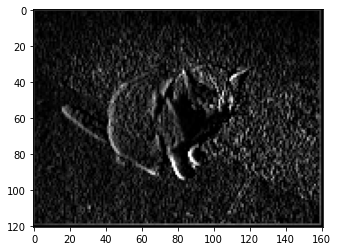

In [ ]:
plt.imshow(result3)
plt.show()

In [ ]:
result4 = maxpool(result2)

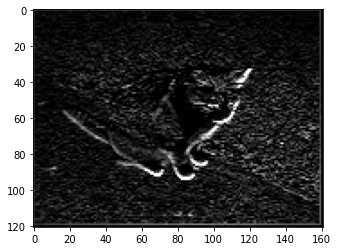

In [ ]:
plt.imshow(result4)
plt.show()